

1. Nomes: Aline Y. Higa- 10402138 1, Gustavo G. Munhoz- 10409258 2, Karine Y. Lim Choi- 10403237 1, Paula A. Oliveira- 10403270 3
Github do arquivo original(annotation.json): https://raw.githubusercontent.com/pedropro/TACO/refs/heads/master/data/annotations.json



In [ ]:
import json
from copy import deepcopy

# Carrega o taco.json original
with open("/content/sample_data/annotations.json") as f:
    taco = json.load(f)

taco_novo = deepcopy(taco)

# Dicionário de nome de categoria → tipo de resíduo
category_to_residuo_tipo = {
    'Clear plastic bottle': 'Plastico',
    'Other plastic bottle': 'Plastico',
    'Plastic bottle cap': 'Plastico',
    'Disposable plastic cup': 'Plastico',
    'Other plastic cup': 'Plastico',
    'Plastic lid': 'Plastico',
    'Plastic straw': 'Plastico',
    'Polypropylene bag': 'Plastico',
    'Crisp packet': 'Plastico',
    'Plastic film': 'Plastico',
    'Single-use carrier bag': 'Plastico',
    'Garbage bag': 'Plastico',
    'Other plastic wrapper': 'Plastico',
    'Spread tub': 'Plastico',
    'Tupperware': 'Plastico',
    'Disposable food container': 'Plastico',
    'Foam food container': 'Plastico',
    'Other plastic container': 'Plastico',
    'Plastic glooves': 'Plastico',
    'Plastic utensils': 'Plastico',
    'Other plastic': 'Plastico',
    'Squeezable tube': 'Plastico',
    'Styrofoam piece': 'Plastico',
    'Foam cup': 'Plastico',
    'Rope & strings': 'Plastico',
    'Six pack rings': 'Plastico',

    #metal
    'Food Can': 'Metal',
    'Drink can': 'Metal',
    'Aerosol': 'Metal',
    'Metal bottle cap': 'Metal',
    'Metal lid': 'Metal',
    'Pop tab': 'Metal',
    'Scrap metal': 'Metal',
    'Aluminium foil': 'Metal',
    'Aluminium blister pack': 'Metal',

    #vidro
    'Glass bottle': 'Vidro',
    'Glass cup': 'Vidro',
    'Glass jar': 'Vidro',
    'Broken glass': 'Vidro',

    #papel
    'Normal paper': 'Papel',
    'Magazine paper': 'Papel',
    'Wrapping paper': 'Papel',
    'Paper cup': 'Papel',
    'Paper bag': 'Papel',
    'Plastified paper bag': 'Papel',
    'Toilet tube': 'Papel',
    'Corrugated carton': 'Papel',
    'Egg carton': 'Papel',
    'Meal carton': 'Papel',
    'Pizza box': 'Papel',
    'Other carton': 'Papel',
    'Drink carton': 'Papel',
    'Carded blister pack': 'Papel',
    #perigoso
    'Battery': 'Perigoso',

    #organico
    'Food waste': 'Organico',
    'Tissues': 'Organico',
    'Paper straw': 'Organico',

    #outros
    'Cigarette': 'Nao reciclavel',
    'Shoe': 'Reciclavel especifico',
    'Unlabeled litter': 'sem classificacao',
}

# Mapeia categoria_id → nome da categoria
category_id_to_name = {cat['id']: cat['name'] for cat in taco['categories']}

# Gera lista única e ordenada dos tipos de resíduo
unique_tipos = sorted(set(category_to_residuo_tipo.values()))
tipo_residuo_to_id = {tipo: i for i, tipo in enumerate(unique_tipos)}

# Cria objeto tipos_residuo com apenas id e name
taco_novo['tipos_residuo'] = [
    {'id': i, 'name': nome} for nome, i in tipo_residuo_to_id.items()
]

# Adiciona o campo tipo_residuo_id em cada anotação
for ann in taco_novo['annotations']:
    cat_id = ann['category_id']
    cat_name = category_id_to_name.get(cat_id)
    tipo_residuo = category_to_residuo_tipo.get(cat_name)

    ann['tipo_residuo_id'] = tipo_residuo_to_id.get(tipo_residuo) if tipo_residuo else None

# Salva o JSON resultante
with open('taco_enriquecido_com_tipo_residuo.json', 'w', encoding='utf-8') as f:
    json.dump(taco_novo, f, ensure_ascii=False, indent=2)

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Caminho para o arquivo JSON
with open("/content/taco_enriquecido_com_tipo_residuo.json") as f:
    taco = json.load(f)


In [ ]:
print("Imagens:", len(taco['images']))
print("Anotações:", len(taco['annotations']))
print("Categorias:", len(taco['categories']))


Imagens: 1500
Anotações: 4784
Categorias: 60


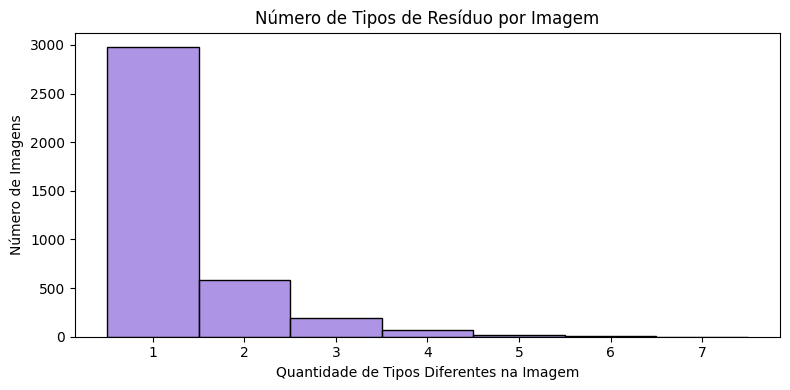

In [ ]:
num_classes_img = image_residuos.apply(len)

plt.figure(figsize=(8, 4))
sns.histplot(num_classes_img, bins=range(1, num_classes_img.max()+2), color='mediumpurple', discrete=True)

plt.title('Número de Tipos de Resíduo por Imagem')
plt.xlabel('Quantidade de Tipos Diferentes na Imagem')
plt.ylabel('Número de Imagens')
plt.tight_layout()
plt.show()

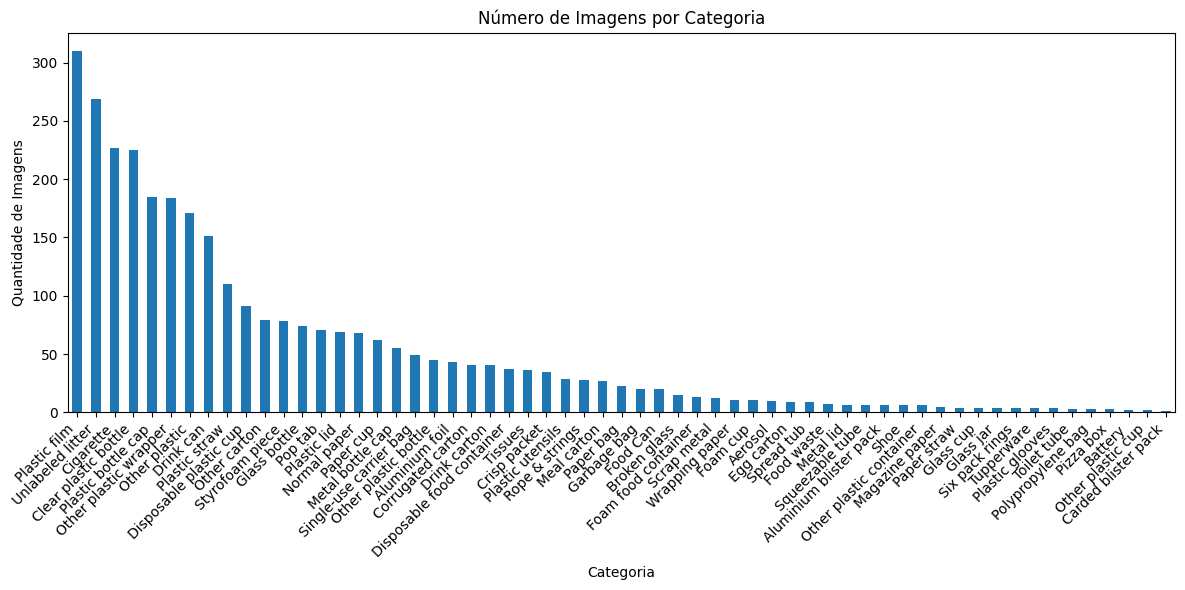

In [ ]:
categories_df = pd.DataFrame(taco['categories'])
annotations_df = pd.DataFrame(taco['annotations'])
images_df = pd.DataFrame(taco['images'])

category_map = {cat['id']: cat['name'] for cat in taco['categories']}
annotations_df['category_name'] = annotations_df['category_id'].map(category_map)

# Remove duplicatas (imagem_id, categoria)
image_category = annotations_df[['image_id', 'category_name']].drop_duplicates()

# Conta quantas imagens têm cada categoria
image_count_by_category = image_category['category_name'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))
image_count_by_category.plot(kind='bar')
plt.title('Número de Imagens por Categoria')
plt.ylabel('Quantidade de Imagens')
plt.xlabel('Categoria')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Nulos encontrados: 0


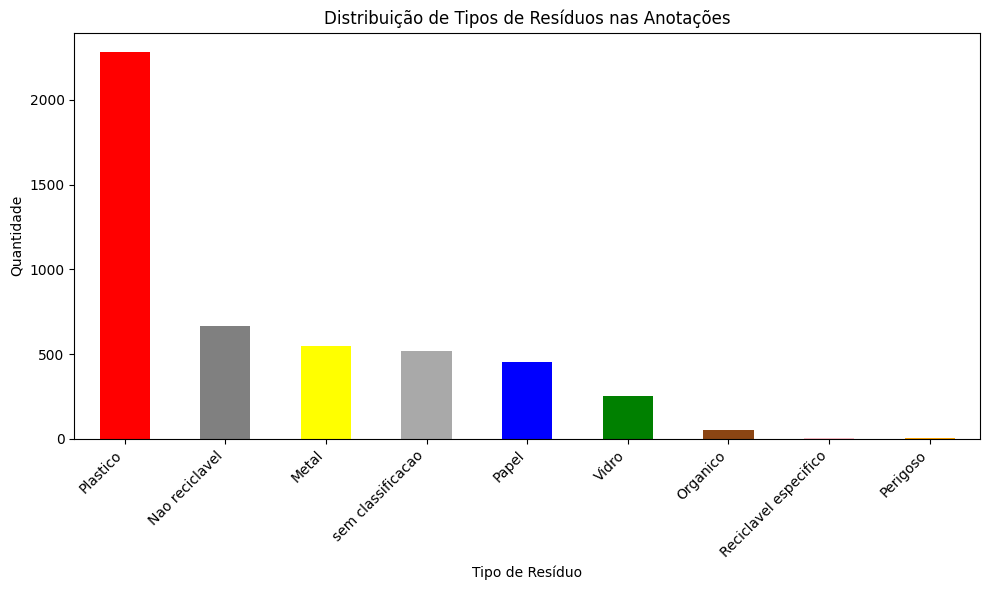

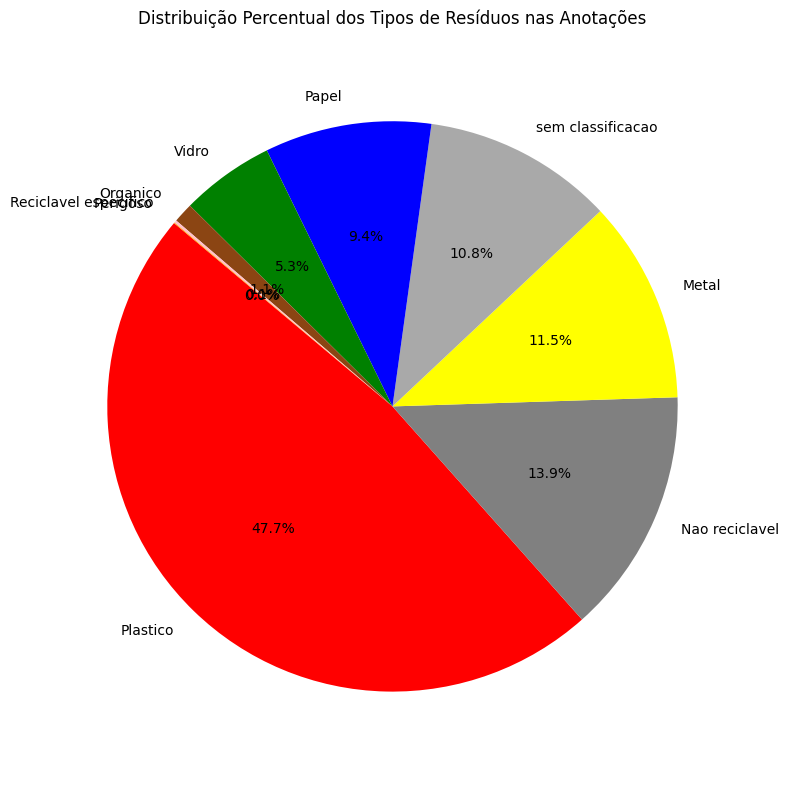

In [ ]:
# 1. Verifica os valores não mapeados
nulos = annotations_df[annotations_df['tipo_residuo'].isnull()]
print(f"Nulos encontrados: {len(nulos)}")
if len(nulos) > 0:
    print(nulos[['category_id', 'name']].drop_duplicates())

# 2. Cores por tipo de resíduo
cores_residuos = {
    'Papel': '#0000FF',                # Azul
    'Plastico': '#FF0000',             # Vermelho
    'Vidro': '#008000',                # Verde
    'Metal': '#FFFF00',                # Amarelo
    'Madeira': '#000000',              # Preto (não usado)
    'Perigoso': '#FFA500',             # Laranja
    'Hospitalar': '#FFFFFF',           # Branco (não usado)
    'Radioativo': '#800080',           # Roxo (não usado)
    'Organico': '#8B4513',             # Marrom
    'Nao reciclavel': '#808080',       # Cinza
    'Reciclavel especifico': '#FFC0CB',# Rosa claro
    'sem classificacao': '#A9A9A9'     # Cinza escuro
}

# 3. Substitui NaN por "sem classificacao" para análise
annotations_df['tipo_residuo'] = annotations_df['tipo_residuo'].fillna('sem classificacao')

# 4. Contagem dos tipos de resíduos
residuo_counts = annotations_df['tipo_residuo'].value_counts()

# 5. Cores alinhadas à ordem
cores = [cores_residuos.get(tipo, '#A9A9A9') for tipo in residuo_counts.index]

# 6. Histograma com cores personalizadas
plt.figure(figsize=(10, 6))
residuo_counts.plot(kind='bar', color=cores)
plt.title('Distribuição de Tipos de Resíduos nas Anotações')
plt.ylabel('Quantidade')
plt.xlabel('Tipo de Resíduo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Gráfico de Pizza
plt.figure(figsize=(8, 8))
plt.pie(residuo_counts, labels=residuo_counts.index, colors=cores,
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title('Distribuição Percentual dos Tipos de Resíduos nas Anotações')
plt.axis('equal')  # Gráfico redondo
plt.tight_layout()
plt.show()
